##### <img src="../SDSS-Logo.png" style="display:inline; width:500px" />


# The objective of this programming exercise is two-fold:
* To run an example that shows the computational efficiency of the Numpy numerical library;
* Get experience with scikit-learn by building a predictive model from data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## Part 1
### For this part, you are going to compare the time it takes to compute row sums and column sums for a large matrix using Numpy functions vs for loops.

#### Numpy method
* Create a large matrix of size `(1000 X 1000)` of random values.
* Use the Numpy `np.sum()` method to calculate the row sums and column sums of this matrix.
* Track the amount of time it took to calculate the row sum and the column sum.
    * You can use the `time.time()` function to track time.

In [2]:
# Write your code here
rng = np.random.default_rng()
randomArray = rng.integers(0, 1000, size=(1000, 1000))
#print(randomArray)
def fastSums(array):
    startTime = time.time()
    row_sum = np.sum(randomArray, axis=1)
    col_sum = np.sum(randomArray, axis=0)
    return (time.time() - startTime)

print(fastSums(randomArray))

0.0016636848449707031


#### for loop method
* Now use `for` loops to compute the row sums and columns sums for the same matrix.
* Again, track the time using the `time.time()` function

In [3]:
# Your code here
def forLoopSums(array):
    row_sum2 = np.zeros(randomArray.shape[0])
    col_sum2 = np.zeros(randomArray.shape[1]) 
    startTime = time.time()  
    for row in range(randomArray.shape[0]):
        row_sum2[row] = sum(randomArray[row,:])
    for col in range(randomArray.shape[1]):
        col_sum2[col] = sum(randomArray[:, col])
    return (time.time() - startTime)

print(forLoopSums(randomArray))

0.09148645401000977


#### Compare the time taken by the two methods.
* What is your conclusion?
* Try other array computations and compare the difference.

In [4]:
# Write your code here
randomArray2 = rng.integers(0, 100000, size=(9000, 9000))
a=fastSums(randomArray2)
print(a)
b= forLoopSums(randomArray2)
print(b)

randomArray3 = rng.integers(0, 100000, size=(10, 10))
c=fastSums(randomArray2)
print(c)
d= forLoopSums(randomArray2)
print(d)


0.0
0.07859015464782715
0.0
0.07841968536376953


Using the np.sum method is much faster than the for loop and when the size of the array decreases then the np.sum method becomes faster whereas the for loop method takes about the same amount of time.

## Part 2
## For this part, you will create a predictive model using scikit-learn to predict vehicle MPG from vehicle characteristic data.
* The data for this part is from [EPA fuel ecomony](https://www.fueleconomy.gov/) website.
* For the purpose of this programming exercise, we have downloaded this data and modified it to create a reasonably clean analytical data set.
* The data set includes the model years 2020-2023.

### Load the vehicles data set for 2020-2023.
* The data is in the CSV file `carDataMPG2023.csv`
* The code below uses the pandas `read_csv()` function to read the data into a pandas data frame.
    * You will learn about pandas and data frame in the next unit, but here we are using it here to simplify the setting up of the problem.

In [5]:
# Read the car MPG data
carDataRead = pd.read_csv("carDataMPG2023.csv")
carDataRead.head(10)

,id,make,model,year,fuelType1,drive,trany,VClass,cylinders,displ,speeds,drive_number,avgMpg
0,41213,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,46.31000
1,41215,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,2.0,6.0,2,42.54910
2,41216,Toyota,Corolla XSE,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AV-S10),Compact Cars,4.0,2.0,10.0,2,45.39342
3,41218,Toyota,Corolla,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Compact Cars,4.0,1.8,6.0,2,44.54000
4,41222,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Manual 6-spd,Small Station Wagons,4.0,2.0,6.0,2,35.47000
5,41223,Kia,Soul,2020,Regular Gasoline,Front-Wheel Drive,Automatic (AM-S7),Small Station Wagons,4.0,1.6,7.0,2,37.86000
6,41227,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.4,6.0,2,33.36895
7,41228,Kia,Sportage FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 2WD,4.0,2.0,6.0,2,29.61000
8,41229,Kia,Telluride FWD,2020,Regular Gasoline,Front-Wheel Drive,Automatic (S8),Small Sport Utility Vehicle 2WD,6.0,3.8,8.0,2,29.00000
9,41230,Kia,Sportage AWD,2020,Regular Gasoline,All-Wheel Drive,Automatic (S6),Small Sport Utility Vehicle 4WD,4.0,2.4,6.0,4,30.21267


### Next create Numpy arrays of the predictor and target variables.
* The predictor variables will be the columns `cylinders`, `displ`, `speeds` and `drive_number`
    * Call the array of predictor variables X
* The target variable will be the column `avgMpg`
    * Call the array of target variable Y
* The Numpy `np.array()` function can convert a homogeneous section of a data frame to a Numpy array.

In [6]:
# Your code here
X = carDataRead[["cylinders", "displ", "speeds", "drive_number"]].to_numpy()
y = carDataRead[["avgMpg"]].to_numpy()

### Print out the number of vehicles in the dataset

In [7]:
# Your code here
len(carDataRead.id.unique())

4536

### Split the X and Y arrays into training and testing datasets using `train_test_split()`.
* Keep 80% of the data for training and 20% for testing. 
* Call the training and testing splits `X_train`, `Y_train`, `X_test` and `Y_test`.

In [8]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2)



### Plot the histograms of `Y_test` and `Y_train` to make sure they are comparable.
* With a large dataset of this size, this is less of a problem than with small data set.
* Nonetheless  it is worth checking that the training-test split has not biased one of these subsets in one way or another.

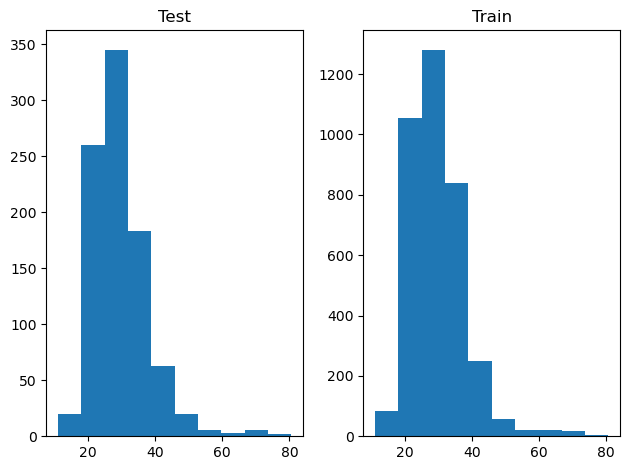

In [9]:
# Your code here
fig, axes = plt.subplots(1, 2)

axes[0].hist(Y_test)
axes[0].set_title('Test')
axes[1].hist(Y_train)
axes[1].set_title('Train')

plt.tight_layout()
plt.show()

### Linear regression fit
* Use the `LinearRegression` model in scikit learn to fit a regression model with `X_train` as the predictor variable and `Y_train` as the target.
* Use `fit` to predict the `avgMpg` from `X_fit`, and called the predicted value `Y_pred`.

In [10]:
# Your code here
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
print(Y_pred)

[[30.6857676 ]
 [21.73255796]
 [16.60968073]
 [37.3606155 ]
 [22.80775436]
 [22.35208202]
 [19.50756651]
 [29.31875056]
 [30.77085399]
 [28.29692445]
 [27.41757199]
 [31.61821422]
 [33.15969714]
 [26.92990741]
 [26.27839112]
 [32.30172274]
 [33.21306743]
 [34.09241989]
 [37.3606155 ]
 [34.09241989]
 [22.17761613]
 [29.8595093 ]
 [38.2719602 ]
 [28.29692445]
 [32.33371497]
 [30.05562937]
 [23.38078146]
 [37.3606155 ]
 [23.38078146]
 [28.9164485 ]
 [21.27716175]
 [32.33371497]
 [34.69056589]
 [32.44447252]
 [30.77085399]
 [37.81628785]
 [37.3606155 ]
 [35.67113892]
 [38.49979637]
 [20.30155645]
 [30.77085399]
 [37.3606155 ]
 [18.99852388]
 [33.21306743]
 [11.95364228]
 [27.15774358]
 [31.56512006]
 [23.83645381]
 [31.61821422]
 [24.56645928]
 [22.17761613]
 [23.38078146]
 [21.04904944]
 [28.9164485 ]
 [25.39903866]
 [32.44447252]
 [16.81669111]
 [20.7572288 ]
 [36.67710698]
 [33.83259148]
 [23.38078146]
 [32.44447252]
 [26.05055495]
 [21.89640967]
 [28.52476062]
 [35.60191058]
 [34.72255

### Outputs
* Print the regression coefficients
* Print the mean squared error between `Y_test` and `Y_pred`
* Print the R^2, called the [coefficient of determination,](https://en.wikipedia.org/wiki/Coefficient_of_determination) between `Y_test` and `Y_pred`

In [11]:
# Your code here
from sklearn.metrics import mean_squared_error, r2_score

print(model.coef_)
print(mean_squared_error(Y_test, Y_pred))
print(r2_score(Y_test, Y_pred))

[[-1.31889062 -2.27836173 -0.87935246 -1.19442158]]
33.33516320555872
0.5326315355416817


### Scatter plots
* Create scatter plots of `Y_test` and `Y_pred` against each of the 4 predictor variables `cylinders`, `displ`, `speeds`, `drive_number`.
* Do this as subplots in a 2 X 2 grid. 
* Label the subplots appropriately.
* Include axis labels also.

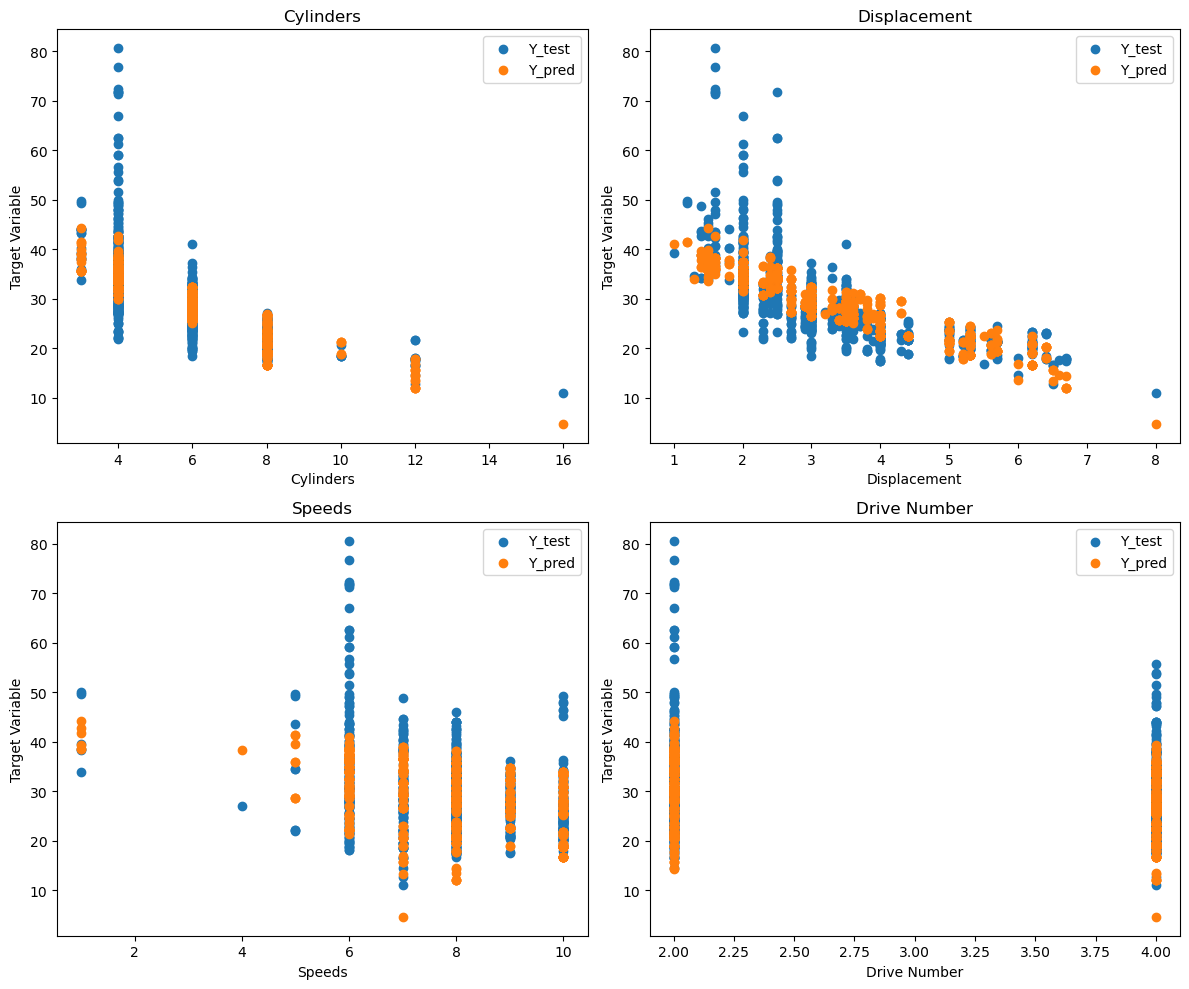

In [12]:
# Your code here
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(X_test[:,0], Y_test, label='Y_test')
axes[0, 0].scatter(X_test[:,0], Y_pred, label='Y_pred')
axes[0, 0].set_title('Cylinders')
axes[0, 0].set_xlabel('Cylinders')
axes[0, 0].set_ylabel('Target Variable')
axes[0, 0].legend()

axes[0, 1].scatter(X_test[:,1], Y_test, label='Y_test')
axes[0, 1].scatter(X_test[:,1], Y_pred, label='Y_pred')
axes[0, 1].set_title('Displacement')
axes[0, 1].set_xlabel('Displacement')
axes[0, 1].set_ylabel('Target Variable')
axes[0, 1].legend()

axes[1, 0].scatter(X_test[:,2], Y_test, label='Y_test')
axes[1, 0].scatter(X_test[:,2], Y_pred, label='Y_pred')
axes[1, 0].set_title('Speeds')
axes[1, 0].set_xlabel('Speeds')
axes[1, 0].set_ylabel('Target Variable')
axes[1, 0].legend()

axes[1, 1].scatter(X_test[:,3], Y_test, label='Y_test')
axes[1, 1].scatter(X_test[:,3], Y_pred, label='Y_pred')
axes[1, 1].set_title('Drive Number')
axes[1, 1].set_xlabel('Drive Number')
axes[1, 1].set_ylabel('Target Variable')
axes[1, 1].legend()

plt.tight_layout()
plt.show()